In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df_sismos = pd.read_csv('seismic_data.csv')
df_sismos.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2025-05-26 03:50:27,-19.63,-69.49,97,5.6
1,2025-05-13 00:47:58,-51.25,-72.28,28,5.1
2,2025-05-05 09:46:48,-29.49,-71.84,48,5.0
3,2025-05-05 02:17:48,-31.89,-70.88,88,5.1
4,2025-05-02 15:23:49,-27.52,-72.48,30,5.8


In [4]:
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date(UTC)  4018 non-null   object 
 1   Latitude   4018 non-null   float64
 2   Longitude  4018 non-null   float64
 3   Depth      4018 non-null   int64  
 4   Magnitude  4018 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [5]:
df_sismos['Date(UTC)'] = pd.to_datetime(df_sismos['Date(UTC)'])
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date(UTC)  4018 non-null   datetime64[ns]
 1   Latitude   4018 non-null   float64       
 2   Longitude  4018 non-null   float64       
 3   Depth      4018 non-null   int64         
 4   Magnitude  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [7]:
df_sismos.isna().sum()

Date(UTC)    0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

In [8]:
df_sismos.duplicated().sum()

3

In [10]:
duplicados = df_sismos[df_sismos.duplicated()]
duplicados

,Date(UTC),Latitude,Longitude,Depth,Magnitude
1823,2019-11-01 23:43:27,-29.25,-71.59,40,4.2
2056,2019-04-25 09:33:32,-29.66,-71.30,68,3.8
2123,2019-03-13 21:46:10,-30.71,-71.41,42,4.1


In [16]:
df_sismos.drop_duplicates(inplace=True)

In [24]:
df_sismos.describe()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
count,4015,4015.000000,4015.000000,4015.000000,4015.000000
mean,2019-04-08 10:15:13.415442176,-27.836257,-70.850692,61.533250,4.429240
min,2012-03-03 11:01:47,-62.350000,-75.730000,2.000000,2.300000
25%,2016-07-13 22:45:27.500000,-31.820000,-71.590000,36.000000,4.000000
50%,2019-06-02 03:21:17,-29.590000,-71.180000,50.000000,4.400000
75%,2021-09-03 08:55:19,-21.500000,-70.030000,86.000000,4.800000
max,2025-05-26 03:50:27,-11.070000,-58.390000,624.000000,8.400000
std,NaN,5.963907,1.293768,38.288026,0.688822


In [18]:
df_sismos.corr()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
Date(UTC),1.000000,-0.094495,0.002650,0.065202,-0.290116
Latitude,-0.094495,1.000000,0.727284,0.383944,0.089707
Longitude,0.002650,0.727284,1.000000,0.668663,0.104340
Depth,0.065202,0.383944,0.668663,1.000000,0.212458
Magnitude,-0.290116,0.089707,0.104340,0.212458,1.000000


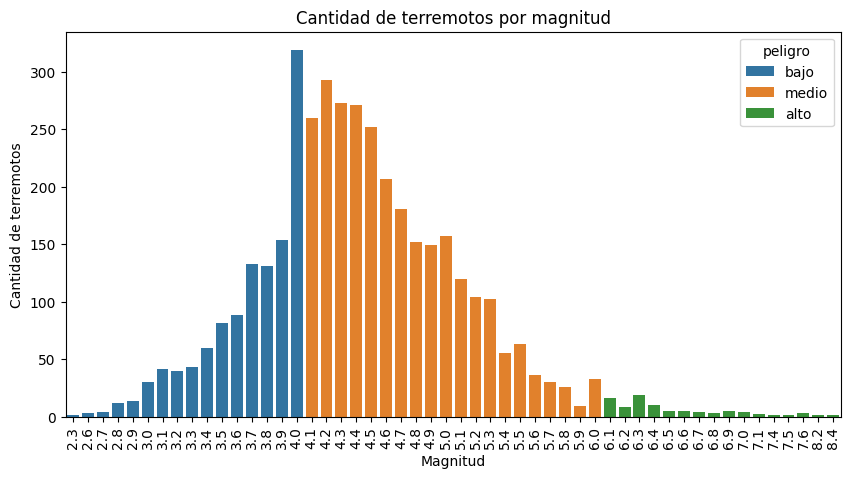

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_sismos,x='Magnitude',hue='peligro')
plt.title('Cantidad de terremotos por magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Cantidad de terremotos')
plt.xticks(rotation=90)
plt.show()

In [31]:
df_sismos['peligro'] = df_sismos['Magnitude'].apply(lambda x: 'bajo' if x <= 4 else 'medio' if x > 4 and x <= 6 else 'alto') 
df_sismos['year'] = df_sismos['Date(UTC)'].dt.year
df_sismos.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude,peligro,mes,year
0,2025-05-26 03:50:27,-19.63,-69.49,97,5.6,medio,2025,2025
1,2025-05-13 00:47:58,-51.25,-72.28,28,5.1,medio,2025,2025
2,2025-05-05 09:46:48,-29.49,-71.84,48,5.0,medio,2025,2025
3,2025-05-05 02:17:48,-31.89,-70.88,88,5.1,medio,2025,2025
4,2025-05-02 15:23:49,-27.52,-72.48,30,5.8,medio,2025,2025


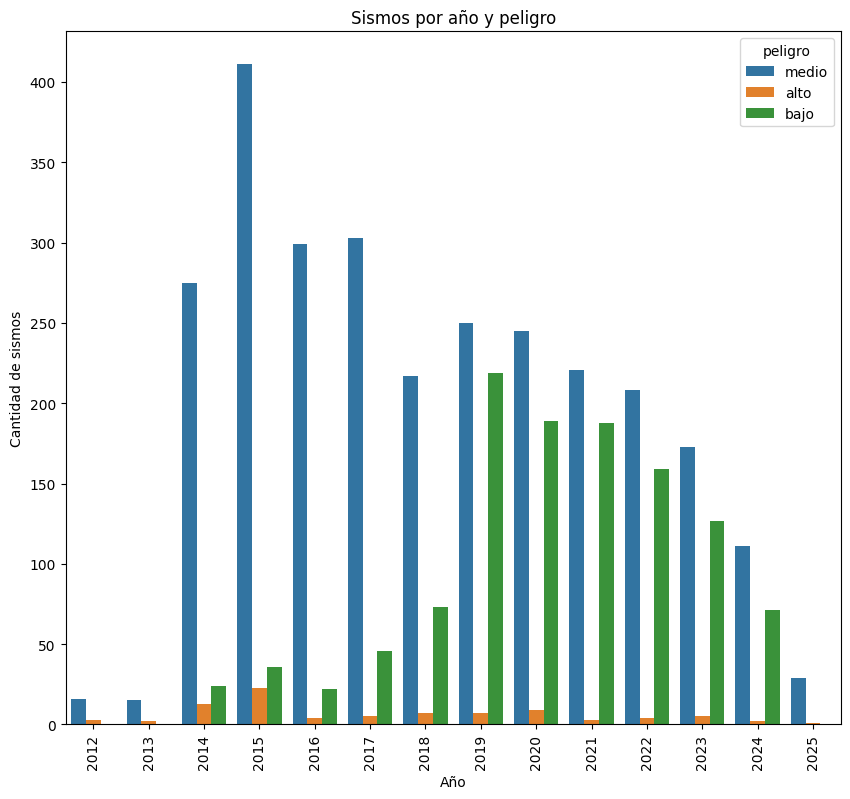

In [35]:
plt.figure(figsize=(10,9))
sns.countplot(data=df_sismos,x='year',hue='peligro')
plt.title('Sismos por año y peligro')
plt.xlabel('Año')
plt.ylabel('Cantidad de sismos')
plt.xticks(rotation=90)
plt.show()

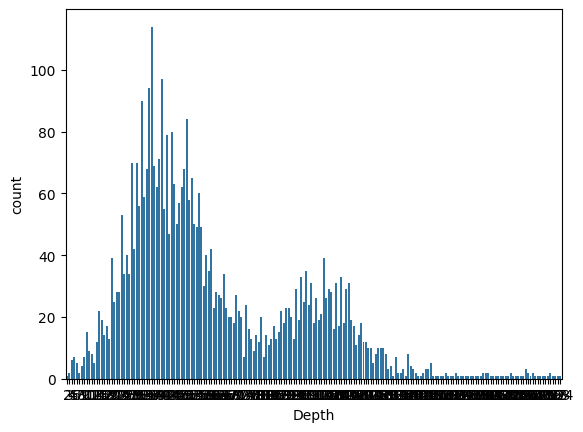

In [36]:
sns.countplot(data=df_sismos,x='Depth')
plt.show()


In [37]:
df_sismos['Depth'].nunique()

199

In [45]:
grooup = df_sismos.groupby('Magnitude')['Depth'].mean()

In [46]:
grooup.head()

Magnitude
2.3    11.000000
2.6    24.000000
2.7    24.250000
2.8    23.583333
2.9    43.214286
Name: Depth, dtype: float64